# Observations and Insights

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
combo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
total_mice = combo_df['Mouse ID'].nunique()
total_mice


249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combo_df.loc[combo_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mice = combo_df.loc[combo_df['Mouse ID'] == 'g989']
all_duplicate_mice                                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combo_df.drop(combo_df.loc[combo_df['Mouse ID']== 'g989'].index, inplace = True)
clean_df = pd.DataFrame(combo_df)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

# Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Group by Drug Regimen
drug_group_df = clean_df.groupby(['Drug Regimen'])

#Create DataFrame
drug_df = pd.DataFrame()
drug_df['Mean']= drug_group_df["Tumor Volume (mm3)"].mean()
drug_df['Median']= drug_group_df["Tumor Volume (mm3)"].median()
drug_df['Variance']= drug_group_df["Tumor Volume (mm3)"].var()
drug_df['Standard Deviation']= drug_group_df["Tumor Volume (mm3)"].std()
drug_df['SEM']= drug_group_df["Tumor Volume (mm3)"].sem()


drug_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

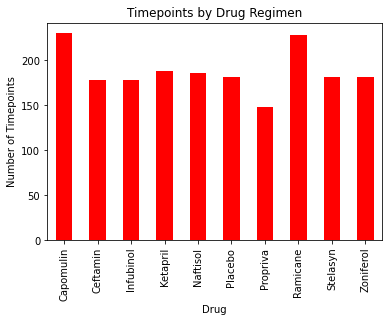

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = drug_group_df ['Timepoint'].count()
total_timepoints

timepoints_chart1 = total_timepoints.plot(kind = 'bar', title = 'Timepoints by Drug Regimen', color = 'red')
timepoints_chart1.set_xlabel("Drug")
timepoints_chart1.set_ylabel("Number of Timepoints")






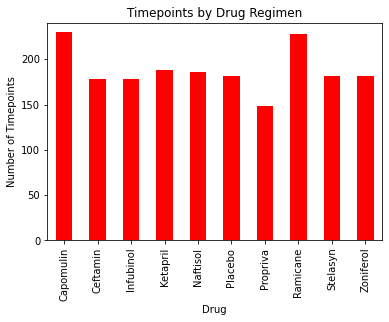

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_group_df['Drug Regimen']))
y_axis = total_timepoints

tick_locations = []

for x in x_axis:
    tick_locations.append(x)
plt.title('Timepoints by Drug Regimen')
plt.xlabel('Drug')
plt.ylabel('Number of Timepoints')

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0,y_axis.max() +10)

plt.xticks(tick_locations, y_axis.index, rotation = "vertical")
plt.bar(x_axis, y_axis, facecolor = 'red', alpha = 1, align = 'center', width = 0.5)
plt.show()

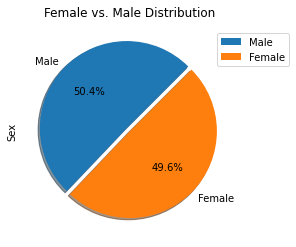

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df[['Mouse ID','Sex']].drop_duplicates()

gender_breakdown = mice_gender['Sex'].value_counts()
explode=(0.05,0)

gender_pie = gender_breakdown.plot(kind = 'pie', title = 'Female vs. Male Distribution',  autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
gender_pie.legend(loc=(.9,.8), labels = gender_breakdown.index)


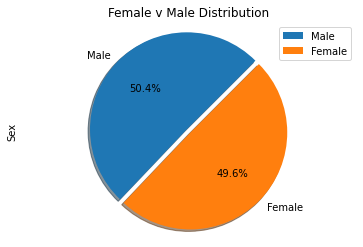

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_breakdown, labels=gender_breakdown.index,autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
plt.axis("equal")
plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()

# Quartiles, Outliers, and Boxplots